<a href="https://colab.research.google.com/github/SachinSPanchal/Mobile-Price-Range-Prediction/blob/main/Final_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Problem Description

##<b>In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

<b>

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are
Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing important libraries
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "/content/data_mobile_price_range.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
data.shape

(2000, 21)

our dataset has 2000 rows and 21 columns

###<b> Checking Null Values

In [10]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##<b> Exploratory Data Analysis

#### 1. Checking the categories of price range

In [11]:
data['price_range'].unique()

array([1, 2, 3, 0])

In [12]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

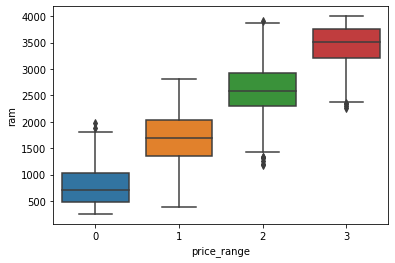

In [13]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= data)
plt.show()

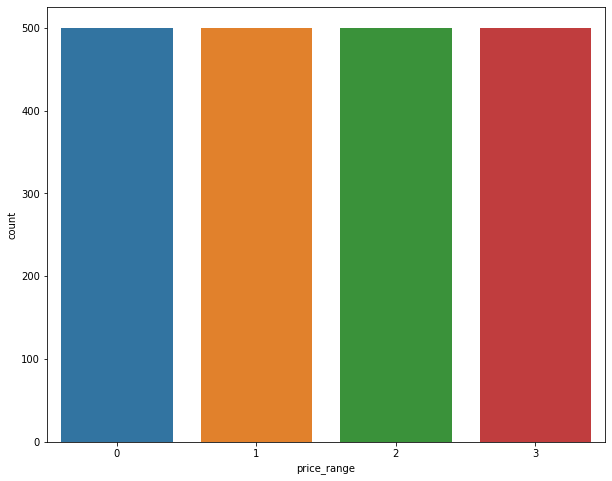

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='price_range', data=data)

In [15]:
numerical_features = data.describe().columns
numerical_features = numerical_features.drop('price_range')
dist_col1 = list(numerical_features[0:10])
dist_col2 = list(numerical_features[10:21])

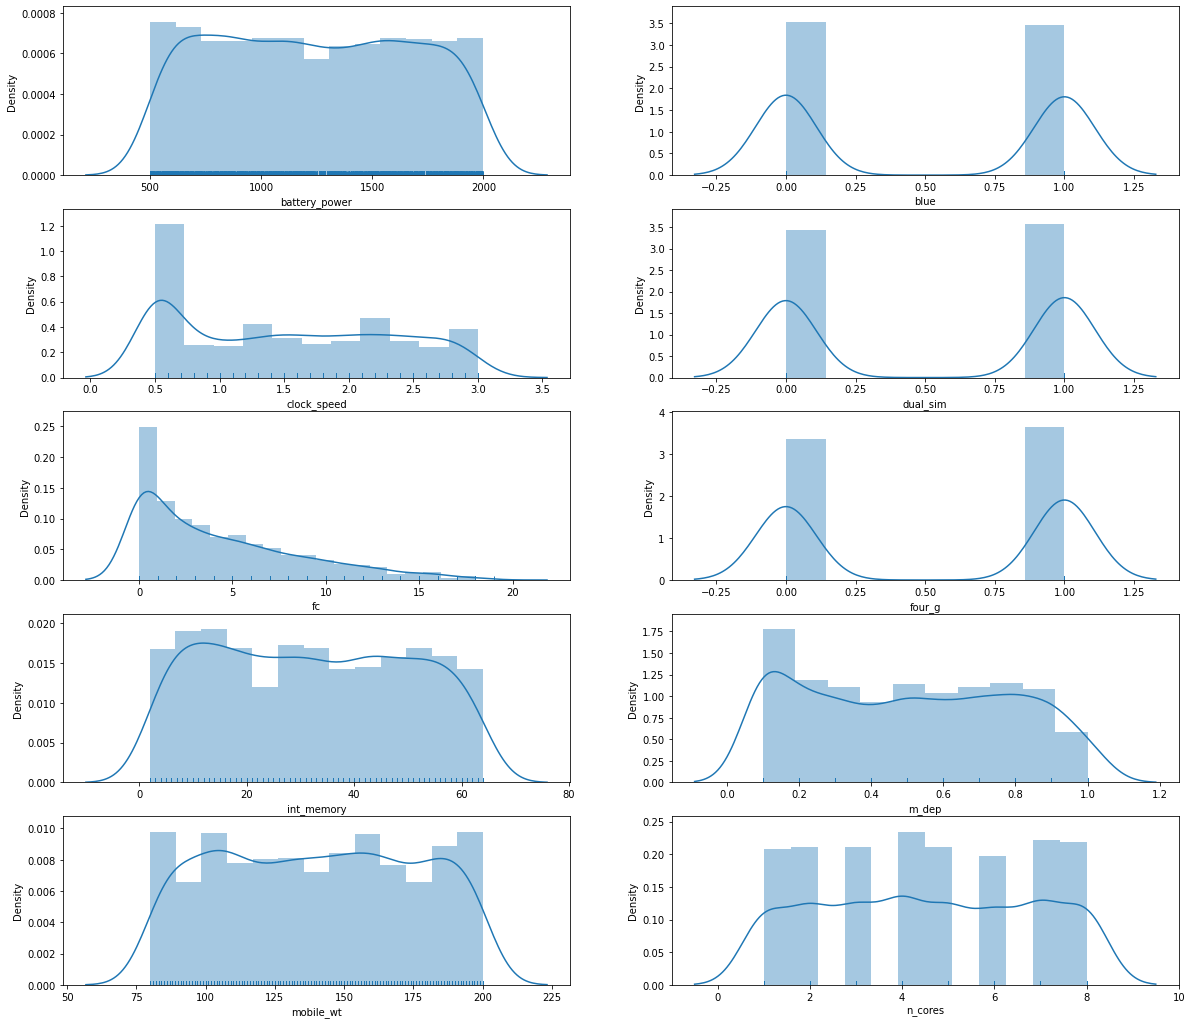

In [16]:
plt.figure(figsize=(20,18))
for i in range(len(dist_col1)):
  plt.subplot(5,2,i+1)
  sns.distplot(data[dist_col1[i]], hist = True, rug = True)


In [17]:
column=data.columns
column.shape

(21,)

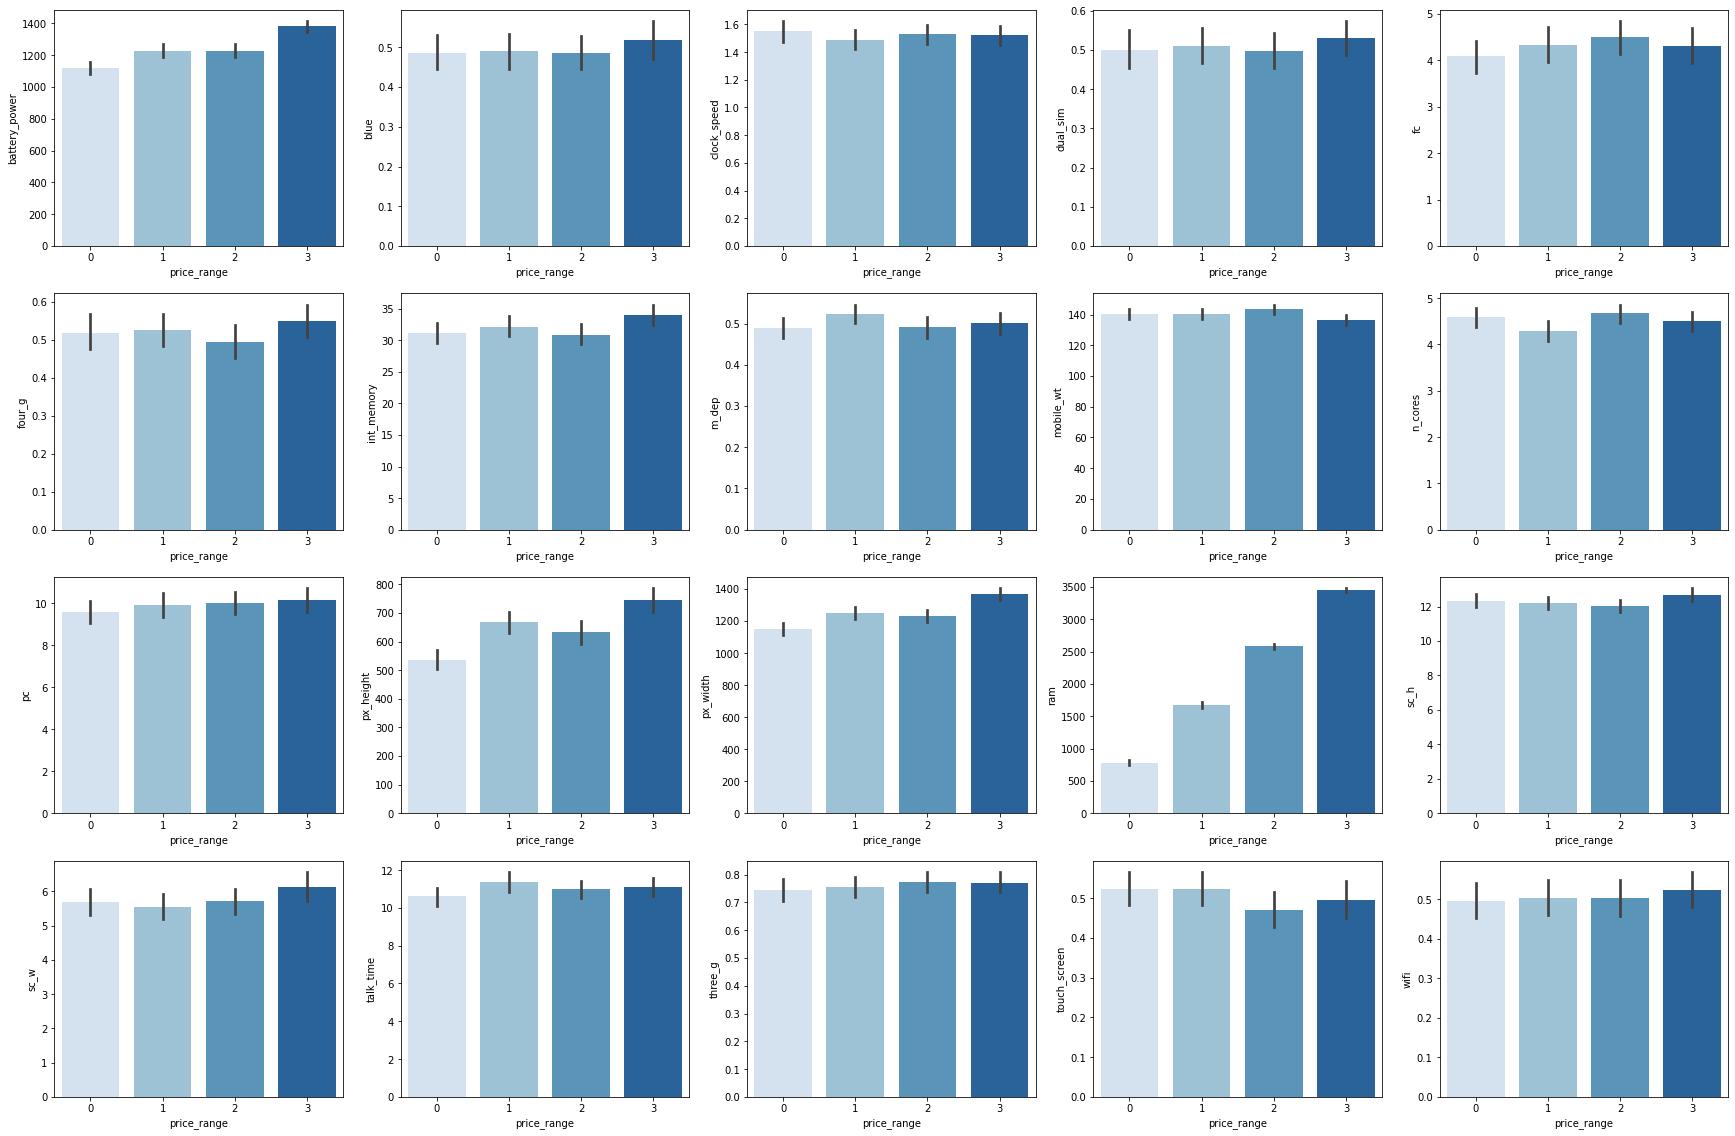

In [18]:
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
k=0
for i in range(4):
  for j in range(5):
 
      sns.barplot(ax=axes[i, j],data=data,x='price_range',y=column[k],palette = 'Blues')
 
      k=k+1

* Here we see that RAM of phone and price are highly corelated.Incress in ram Incress in price.

* After that 4g_band and batry of phone also afect phone price.

* Mobile wt is decrese when price high, but mobile size is increase.

#### <b> 3G supported or Not supported

([<matplotlib.patches.Wedge at 0x7f62a38aefd0>,
 [Text(-0.8054050133969238, 0.7492147652009409, '3g supported'),
  Text(0.8054050133969238, -0.749214765200941, 'not supported')],
 [Text(-0.43931182548923114, 0.4086625992005132, '76.2%'),
  Text(0.43931182548923114, -0.40866259920051323, '23.8%')])

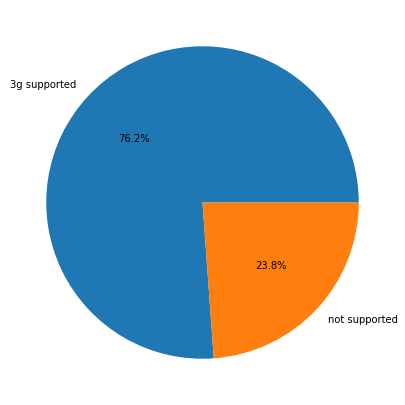

In [19]:
plt.figure(figsize=(7,8))
labels = ['3g supported','not supported']
values =data['three_g'].value_counts().values
plt.pie(values, labels=labels,autopct='%1.1f%%')

#### So clearly 76.2% of mobiles supported 3G

#### <b> 4G

([<matplotlib.patches.Wedge at 0x7f629e1217d0>,
 [Text(-0.0742421550154638, 1.097491732278043, '4g supported'),
  Text(0.07424215501546366, -1.0974917322780433, 'not supported')],
 [Text(-0.0404957209175257, 0.5986318539698416, '52.1%'),
  Text(0.04049572091752563, -0.5986318539698418, '47.9%')])

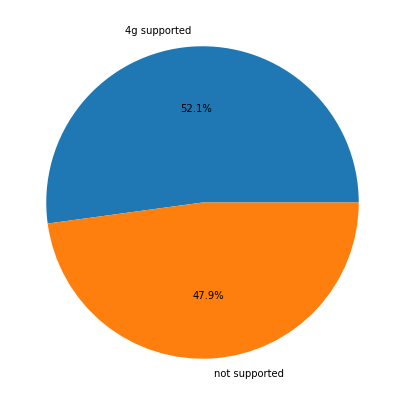

In [20]:
plt.figure(figsize=(7,8))
labels4g = ['4g supported','not supported']
values4g =data['four_g'].value_counts().values
plt.pie(values4g, labels=labels4g ,autopct='%1.1f%%')